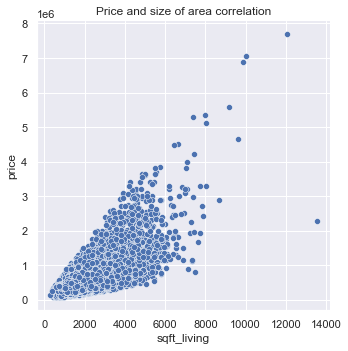

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df import
df1 = pd.read_csv('./data/kc_house_data.csv')
#Price-area graph
sns.set_theme()
sns.relplot(data=df1, x='sqft_living', y='price', palette='tab20b').set(title='Price and size of area correlation');


In [86]:
#Search for the maximum, minimum and average price
p = df1['price']

print("max =", p.max())
print("min =", p.min())
print("average =", p.mean())


max = 7700000.0
min = 75000.0
average = 540088.1417665294


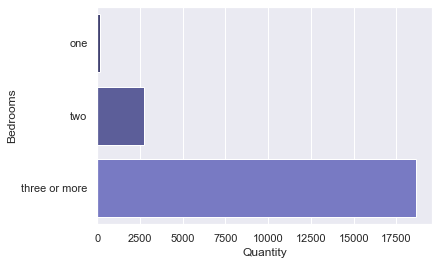

In [87]:
#Bedrooms chart
b = df1['bedrooms']

one_bedroom, two_bedrooms, three_or_more = [], [], []

for i in b:
    if (i == 1):
        one_bedroom.append(i)
    elif (i == 2):
        two_bedrooms.append(1)
    elif (i >= 3):
        three_or_more.append(1)

data = [[len(one_bedroom), 'one'], [len(two_bedrooms), 'two'], [len(three_or_more), 'three or more']]
df2 = pd.DataFrame(data, columns = ['Quantity', 'Bedrooms'])

sns.barplot(x='Quantity', y='Bedrooms', data=df2, palette='tab20b');

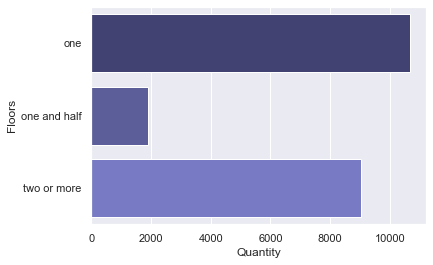

In [88]:
#Floors chart
f = df1['floors']

one_floor, one_and_half, two_or_more = [], [], []

for i in f:
    if (i == 1):
        one_floor.append(i)
    elif (i == 1.5):
        one_and_half.append(1)
    elif (i >= 2):
        two_or_more.append(1)

data = [[len(one_floor), 'one'], [len(one_and_half), 'one and half'], [len(two_or_more), 'two or more']]
df3 = pd.DataFrame(data, columns = ['Quantity', 'Floors'])

sns.barplot(x='Quantity', y='Floors', data=df3, palette='tab20b');

16768   2014-05-02
9596    2014-05-02
9587    2014-05-02
20602   2014-05-02
11577   2014-05-02
           ...    
7898    2015-05-14
928     2015-05-14
5637    2015-05-15
13053   2015-05-24
16594   2015-05-27
Name: date, Length: 21613, dtype: datetime64[ns]


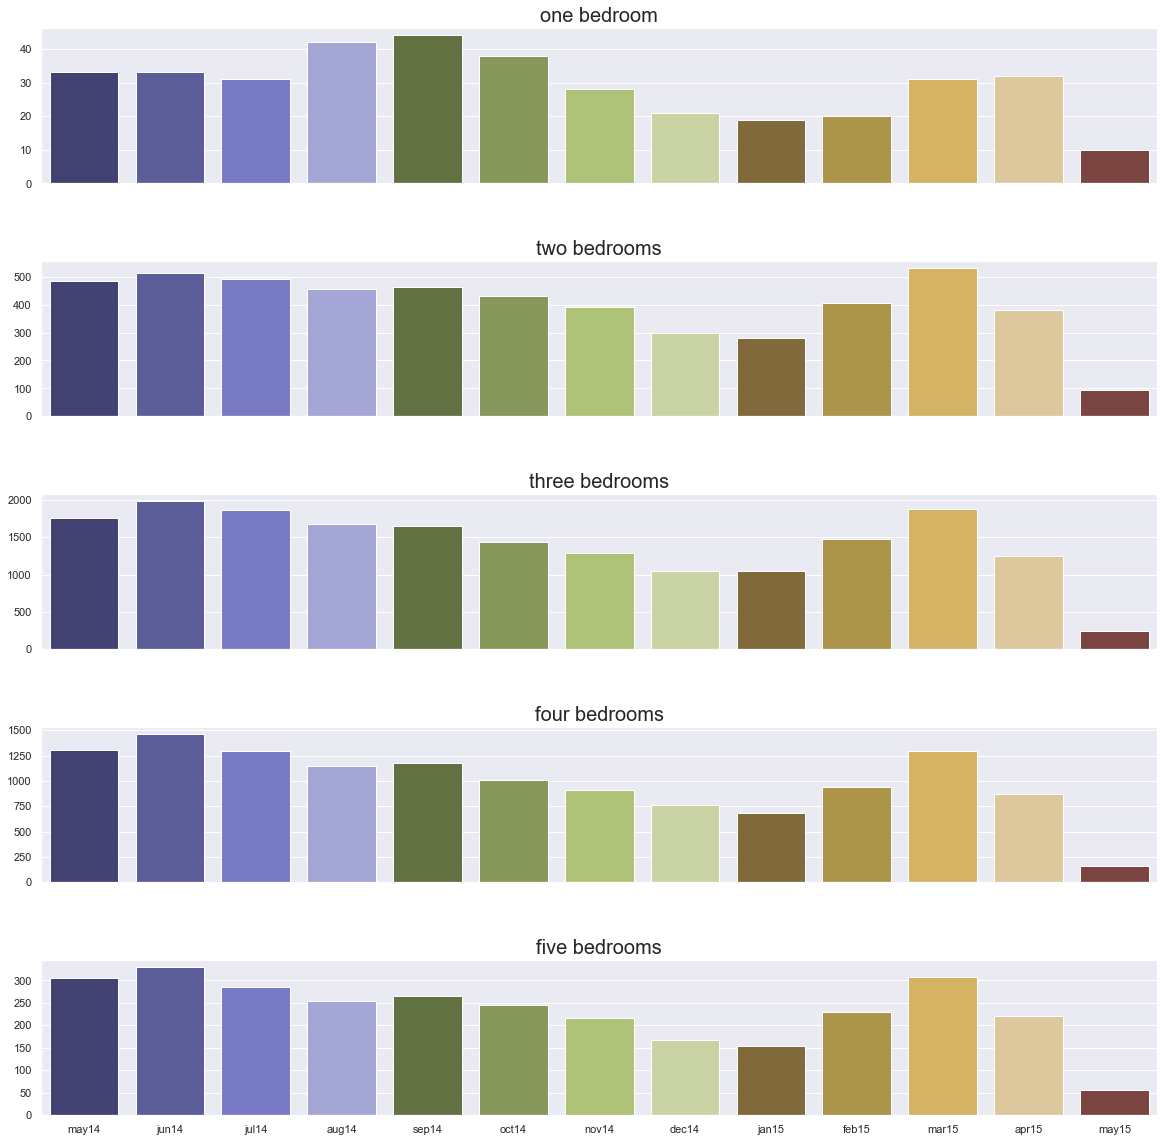

In [89]:
fig, ax = plt.subplots(5, 1, sharex=True, figsize=(20,20))
fig.subplots_adjust(hspace=.5)

d = pd.to_datetime(df1['date'])
#To understand time limits
print(d.sort_values())

date_start_end_range_dictionary = {
    "20140701T000000": "20140501T000000",
    "20140801T000000": "20140601T000000",
    "20140901T000000": "20140701T000000",
    "20141001T000000": "20140801T000000",
    "20141101T000000": "20140901T000000",
    "20141201T000000": "20141001T000000",
    "20150101T000000": "20141101T000000",
    "20150201T000000": "20141201T000000",
    "20150301T000000": "20150101T000000",
    "20150401T000000": "20150201T000000",
    "20150501T000000": "20150301T000000",
    "20150601T000000": "20150401T000000",
    "20150701T000000": "20150501T000000",
}

def df_query_date_range_bedrooms(df, date_start, date_end, bedroom)-> int:
    q = 'date < ' + '\"' + date_start + '\"' + ' and date > ' + '\"' + date_end + '\"' +' and bedrooms == ' + str(bedroom)
    df.query(q)
    return len(df.query(q))

res1, res2, res3, res4, res5 = [], [], [], [], []

for item in date_start_end_range_dictionary.items():
    res1.append(df_query_date_range_bedrooms(df1, item[0], item[1], 1))
    res2.append(df_query_date_range_bedrooms(df1, item[0], item[1], 2))
    res3.append(df_query_date_range_bedrooms(df1, item[0], item[1], 3))
    res4.append(df_query_date_range_bedrooms(df1, item[0], item[1], 4))
    res5.append(df_query_date_range_bedrooms(df1, item[0], item[1], 5))

months = ['may14', 'jun14', 'jul14', 'aug14', 'sep14', 'oct14', 'nov14', 'dec14', 'jan15', 'feb15', 'mar15', 'apr15', 'may15']

sns.barplot(x=months, y=res1, ax=ax[0], palette='tab20b').set_title('one bedroom', size=20)
sns.barplot(x=months, y=res2, ax=ax[1], palette='tab20b').set_title('two bedrooms', size=20)
sns.barplot(x=months, y=res3, ax=ax[2], palette='tab20b').set_title('three bedrooms', size=20)
sns.barplot(x=months, y=res4, ax=ax[3], palette='tab20b').set_title('four bedrooms', size=20)
sns.barplot(x=months, y=res5, ax=ax[4], palette='tab20b').set_title('five bedrooms', size=20);
